<a href="https://colab.research.google.com/github/soumyapachal-SP/Intrusion-Detection-System/blob/main/UNSW_NB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting to Drive**

In [ ]:
# Mount Google Drive to access stored files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing Required Libraries**

In [ ]:
# Install necessary Python libraries for machine learning and data processing
!pip install xgboost  # XGBoost for gradient boosting
!pip install lightgbm  # LightGBM for efficient boosting
!pip install networkx  # NetworkX for graph-based analysis
!pip install scikit-learn  # Scikit-learn for machine learning models
!pip install matplotlib  # Matplotlib for visualization
!pip install seaborn  # Seaborn for statistical data visualization

**Importing Libraries**

In [ ]:
# Import required libraries
import pandas as pd  # Pandas for handling tabular data
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced data visualization
import xgboost as xgb  # XGBoost for gradient boosting classification

# Import preprocessing and machine learning models from Scikit-learn
from sklearn.preprocessing import StandardScaler  # StandardScaler for feature scaling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Random Forest and Gradient Boosting classifiers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Metrics for evaluating model performance


**Loading the dataset**

In [ ]:
# Load training and testing dataset file paths
train_path = '/content/drive/MyDrive/UNSW-NB15_dataset/UNSW_NB15_training-set.csv'  # Path to training dataset
test_path = '/content/drive/MyDrive/UNSW-NB15_dataset/UNSW_NB15_testing-set.csv'  # Path to testing dataset

# Read the CSV files into Pandas DataFrames
df_train = pd.read_csv(train_path)  # Load training dataset into a DataFrame
df_test = pd.read_csv(test_path)  # Load testing dataset into a DataFrame

# Display the first five rows of the training dataset to check its structure
display(df_train.head())

# Display the first five rows of the testing dataset to understand its format
display(df_test.head())

# Print the shape (number of rows and columns) of the training dataset
print("Training Data Shape:", df_train.shape)  # Helps in understanding the dataset size

# Print the shape (number of rows and columns) of the testing dataset
print("Testing Data Shape:", df_test.shape)  # Helps in confirming data consistency

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


Training Data Shape: (82332, 45)
Testing Data Shape: (175341, 45)


**Checking Missing Values in train and test dataset**

In [ ]:
# Check for missing values in the training dataset
print("Missing Values in Train:")  # Print a header for clarity
print(df_train.isnull().sum())  # Check and print the count of missing values per column in training data

# Check for missing values in the testing dataset
print("Missing Values in Test:")  # Print a header for clarity
print(df_test.isnull().sum())  # Check and print the count of missing values per column in testing data


Missing Values in Train:
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips

In [ ]:
display(df_train.head()) # to display the first five rows of the training datasets, helping to understand their structure
display(df_test.head()) # to display the first five rows of the testing datasets, helping to understand their structure

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


**Encoding Categorical Features Using Label Encoder**

In [ ]:
# Import LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder  # LabelEncoder converts categorical variables into numerical values

# Define a function to encode categorical features
def encode_categorical_features(df):
    # Create a LabelEncoder object
    le = LabelEncoder()  # Initialize a LabelEncoder instance

    # Identify categorical columns in the dataset
    categorical_cols = df.select_dtypes(include=['object']).columns  # Select columns with categorical data

    # Encode each categorical column using LabelEncoder
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])  # Convert categorical values to numerical representations
    return df  # Return the modified DataFrame

# Encode categorical features in the training dataset
df_train = encode_categorical_features(df_train)  # Apply encoding function to training data

# Encode categorical features in the testing dataset
df_test = encode_categorical_features(df_test)  # Apply encoding function to testing data

# Display the first five rows of the transformed training dataset
display(df_train.head())

# Display the first five rows of the transformed testing dataset
display(df_test.head())

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,6,0


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


**Feature Selection and Preprocessing**

In [ ]:
# Feature Selection and Preprocessing
X = df_train.drop(columns=['attack_cat'])  # Select features by removing the target variable 'attack_cat'
y = df_train['attack_cat']  # Target variable containing attack categories

# Convert all columns to numeric, replacing errors with NaN
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Ensures all values are numerical, replacing invalid entries with NaN

# Impute missing values (NaN) with the mean of the column
X = X.fillna(X.mean())  # Replace missing values with column-wise mean to maintain data consistency


**Standardize Features**

In [ ]:
# Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler  # StandardScaler standardizes features by removing mean and scaling to unit variance

# Initialize StandardScaler
scaler = StandardScaler()  # Create a StandardScaler instance for normalization

# Fit and transform the training data
X_scaled = scaler.fit_transform(X)  # Fit scaler on training data and transform it to have zero mean and unit variance

# Prepare the testing data for scaling
X_test = df_test.drop(columns=['attack_cat'])  # Select features from testing dataset, excluding target variable

# Convert all columns to numeric, replacing errors with NaN
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # Convert non-numeric values to NaN

# Impute missing values (NaN) with the mean of the column
X_test = X_test.fillna(X_test.mean())  # Replace missing values with column-wise mean to maintain consistency

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)  # Apply the trained scaler from training data to avoid data leakage


**Train-Test Split**

In [ ]:
# Import train_test_split for splitting data
from sklearn.model_selection import train_test_split

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42  # 20% of the data is used for validation, random state ensures reproducibility
)

**Random Forest Classification Report**

In [ ]:
# Import required libraries for classification and evaluation
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier for model training
from sklearn.metrics import accuracy_score, classification_report  # Import accuracy_score and classification_report for evaluation

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Create a RandomForest model with 100 trees
rf_classifier.fit(X_train, y_train)  # Train the model using the training data

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)  # Predict target values for validation data

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)  # Calculate accuracy of predictions
print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")  # Print accuracy percentage

# Print detailed classification report
print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred))  # Generate and display classification metrics


Random Forest Accuracy: 90.22%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.08      0.09       131
           1       0.01      0.01      0.01       117
           2       0.41      0.38      0.39       786
           3       0.72      0.79      0.75      2275
           4       0.85      0.88      0.87      1212
           5       1.00      0.98      0.99      3723
           6       1.00      1.00      1.00      7418
           7       0.90      0.79      0.84       723
           8       0.61      0.73      0.67        75
           9       0.00      0.00      0.00         7

    accuracy                           0.90     16467
   macro avg       0.56      0.56      0.56     16467
weighted avg       0.90      0.90      0.90     16467



**Confusion Matrix for Random Forest**

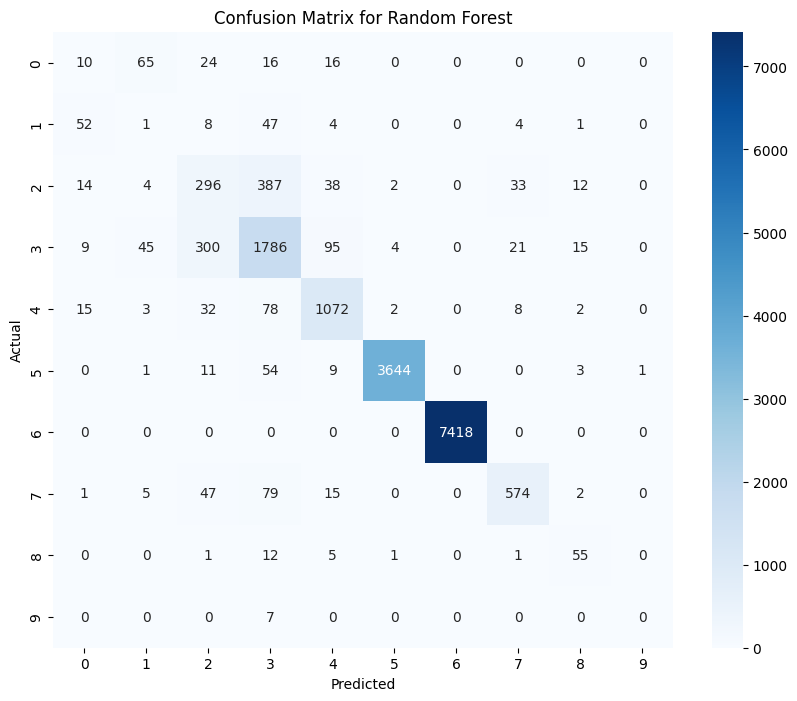

In [ ]:
# Import required libraries for visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced visualization
import numpy as np  # NumPy for numerical operations

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)  # Compute confusion matrix

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Create a heatmap with labels and formatting
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('Actual')  # Label y-axis
plt.title('Confusion Matrix for Random Forest')  # Title for the plot
plt.show()  # Display the confusion matrix

**XGBoost Classification Report**

In [ ]:
# Import XGBoost classifier
import xgboost as xgb  # XGBoost is an optimized gradient boosting library

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')  # Configure classifier
xgb_classifier.fit(X_train, y_train)  # Train the model

# Make predictions on the validation set
y_pred_xgb = xgb_classifier.predict(X_val)  # Predict using XGBoost model

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)  # Calculate accuracy
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")  # Print accuracy percentage

# Print detailed classification report
print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb))  # Generate and display classification metrics


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:48:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 90.56%
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.08      0.14       131
           1       0.25      0.02      0.03       117
           2       0.46      0.58      0.51       786
           3       0.75      0.73      0.74      2275
           4       0.74      0.88      0.80      1212
           5       0.99      0.98      0.99      3723
           6       1.00      1.00      1.00      7418
           7       0.95      0.81      0.87       723
           8       0.65      0.68      0.66        75
           9       0.50      0.29      0.36         7

    accuracy                           0.91     16467
   macro avg       0.70      0.60      0.61     16467
weighted avg       0.91      0.91      0.90     16467



**Confusion Matrix for XGBoost**

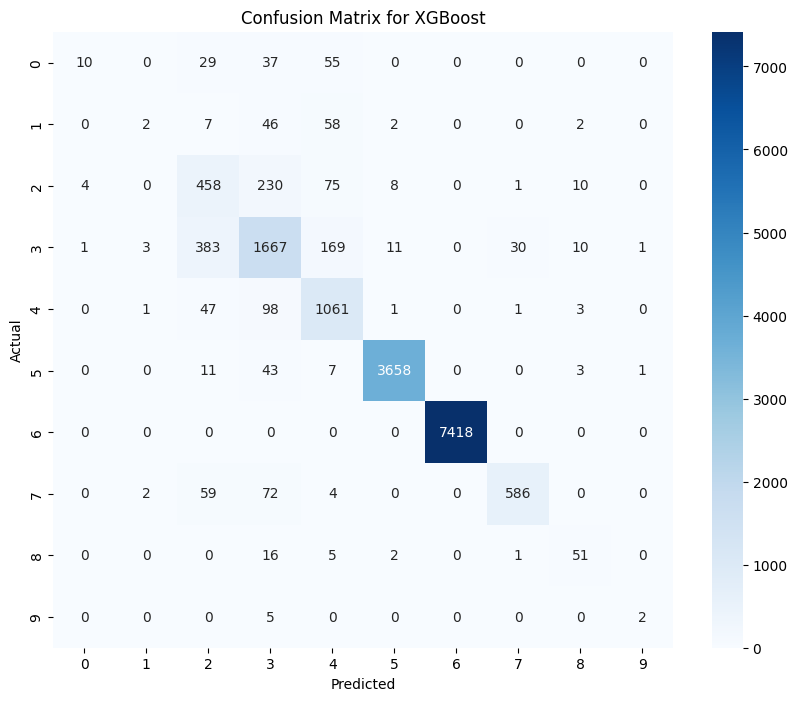

In [ ]:
# Import required libraries for visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced visualization
import numpy as np  # NumPy for numerical operations
from sklearn.metrics import confusion_matrix  # Import confusion matrix function

# Generate confusion matrix for XGBoost model
cm_xgb = confusion_matrix(y_val, y_pred_xgb)  # Compute confusion matrix for XGBoost predictions

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',  # Create a heatmap with labels and formatting
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('Actual')  # Label y-axis
plt.title('Confusion Matrix for XGBoost')  # Title for the plot
plt.show()  # Display the confusion matrix


**Lightgbm Classification Report**

In [ ]:
# Import LightGBM classifier
import lightgbm as lgb  # LightGBM is a gradient boosting framework for efficient training

# Initialize and train the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)  # Create a LightGBM model with 100 trees
lgb_classifier.fit(X_train, y_train)  # Train the model using the training data

# Make predictions on the validation set
y_pred_lgb = lgb_classifier.predict(X_val)  # Predict target values for validation data

# Evaluate the LightGBM model
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)  # Calculate accuracy of predictions
print(f"LightGBM Accuracy: {accuracy_lgb * 100:.2f}%")  # Print accuracy percentage

# Print detailed classification report
print("LightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgb))  # Generate and display classification metrics


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6084
[LightGBM] [Info] Number of data points in the train set: 65865, number of used features: 44
[LightGBM] [Info] Start training from score -4.792743
[LightGBM] [Info] Start training from score -4.951177
[LightGBM] [Info] Start training from score -2.992776
[LightGBM] [Info] Start training from score -2.006399
[LightGBM] [Info] Start training from score -2.608628
[LightGBM] [Info] Start training from score -1.469739
[LightGBM] [Info] Start training from score -0.800441
[LightGBM] [Info] Start training from score -3.167677
[LightGBM] [Info] Start training from score -5.381630
[LightGBM] [Info] Start training from score -7.484445
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy: 74.80%
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.05      0.05       131
           1       0.01      0.01      0.01       117
           2       0.34      0.23      0.27       786
           3       0.56      0.47      0.51      2275
           4       0.45      0.25      0.32      1212
           5       0.96      0.93      0.94      3723
           6       0.78      0.94      0.85      7418
           7       0.67      0.42      0.52       723
           8       0.10      0.07      0.08        75
           9       0.00      0.00      0.00         7

    accuracy                           0.75     16467
   macro avg       0.39      0.34      0.36     16467
weighted avg       0.72      0.75      0.73     16467



**Confusion Matrix for lightgbm**

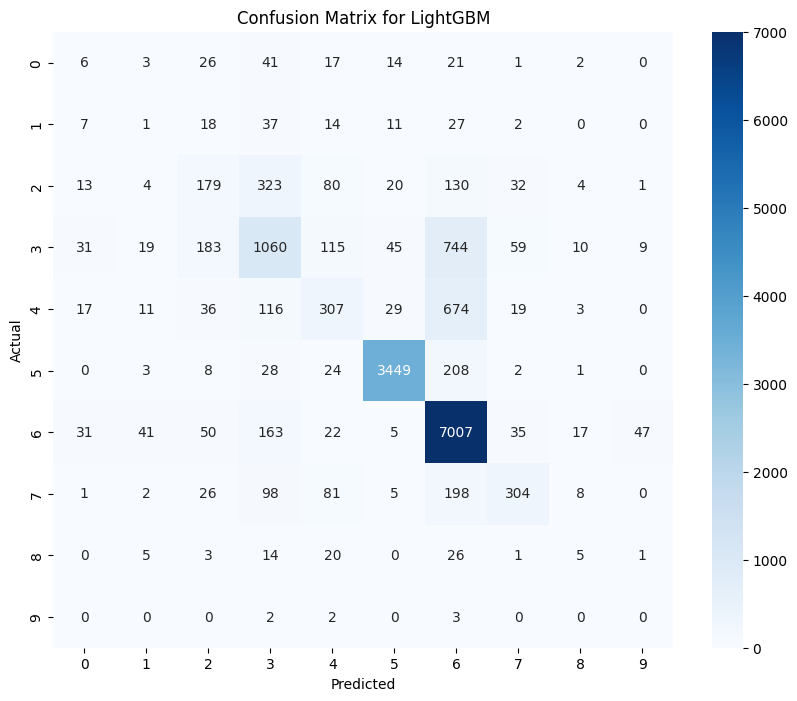

In [ ]:
# Import required libraries for visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced visualization
import numpy as np  # NumPy for numerical operations
from sklearn.metrics import confusion_matrix  # Import confusion matrix function

# Generate confusion matrix for LightGBM model
cm_lgb = confusion_matrix(y_val, y_pred_lgb)  # Compute confusion matrix for LightGBM predictions

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues',  # Create a heatmap with labels and formatting
            xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('Actual')  # Label y-axis
plt.title('Confusion Matrix for LightGBM')  # Title for the plot
plt.show()  # Display the confusion matrix

**Hypergraph Ensemble Model Classification Report**

Hypergraph Ensemble Model Accuracy: 90.02%
              precision    recall  f1-score   support

           0       1.00      0.07      0.13       131
           1       0.04      0.01      0.01       117
           2       0.37      0.54      0.44       786
           3       0.80      0.72      0.76      2275
           4       0.77      0.91      0.83      1212
           5       0.98      0.97      0.98      3723
           6       0.99      1.00      1.00      7418
           7       0.97      0.77      0.86       723
           8       0.71      0.61      0.66        75
           9       0.00      0.00      0.00         7

    accuracy                           0.90     16467
   macro avg       0.66      0.56      0.57     16467
weighted avg       0.91      0.90      0.90     16467



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


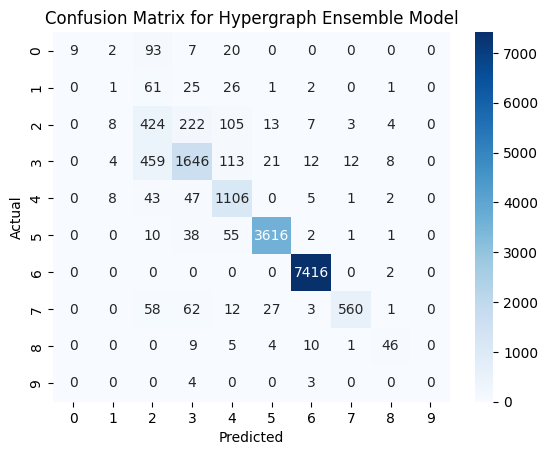

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Import ensemble classifiers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import evaluation metrics
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import seaborn as sns  # Seaborn for enhanced visualization

# Hypergraph Ensemble Model: Combining Multiple Classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Initialize RandomForest model with 100 trees
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Initialize GradientBoosting model with 100 estimators

# Train both classifiers
rf.fit(X_train, y_train)  # Train RandomForest model on training data
gb.fit(X_train, y_train)  # Train GradientBoosting model on training data

# Make predictions on the validation set
rf_preds = rf.predict(X_val)  # Predictions from RandomForest
gb_preds = gb.predict(X_val)  # Predictions from GradientBoosting

# Ensemble Strategy: Majority Voting
ensemble_preds = np.round((rf_preds + gb_preds) / 2)  # Combine predictions using majority voting

# Evaluate the ensemble model
accuracy = accuracy_score(y_val, ensemble_preds)  # Compute accuracy of the ensemble model
print(f"Hypergraph Ensemble Model Accuracy: {accuracy*100:.2f}%")  # Print accuracy percentage
print(classification_report(y_val, ensemble_preds))  # Generate and display classification report

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_val, ensemble_preds), annot=True, fmt='d', cmap='Blues')  # Create a heatmap with labels
plt.xlabel('Predicted')  # Label x-axis
plt.ylabel('Actual')  # Label y-axis
plt.title('Confusion Matrix for Hypergraph Ensemble Model')  # Title for the plot
plt.show()  # Display the confusion matrix


**Hypergraph Representation for Feature Combinations**

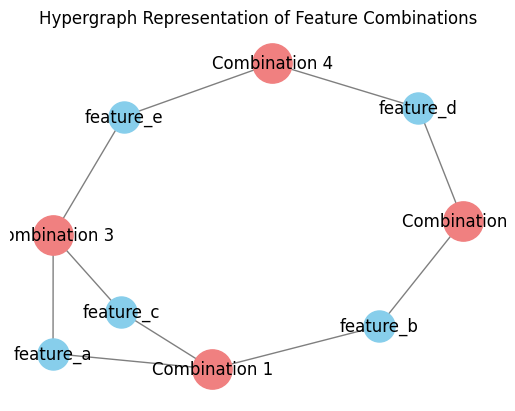

In [ ]:
# Import required libraries for visualization
import matplotlib.pyplot as plt  # For plotting the hypergraph
import networkx as nx  # For creating and visualizing the graph structure

# Sample feature combinations (replace with actual feature combinations)
feature_combinations = {
    'Combination 1': ['feature_a', 'feature_b', 'feature_c'],  # Example set of features
    'Combination 2': ['feature_b', 'feature_d'],  # Another example combination
    'Combination 3': ['feature_a', 'feature_c', 'feature_e'],  # Features forming another group
    'Combination 4': ['feature_d', 'feature_e']  # Another set of related features
}

# Function to draw the hypergraph

def draw_hypergraph(feature_combinations):
    graph = nx.Graph()  # Initialize an undirected graph
    nodes = set()  # Create an empty set to track unique nodes

    # Iterate over feature combinations to build the graph
    for combination_name, features in feature_combinations.items():
        nodes.update(features)  # Add all features to the set of nodes
        graph.add_node(combination_name, type='combination')  # Add combination node
        for feature in features:
            graph.add_node(feature, type='feature')  # Add individual feature nodes
            graph.add_edge(combination_name, feature)  # Create edges between the combination and features

    pos = nx.spring_layout(graph)  # Compute layout for better visualization

    # Draw feature nodes in sky blue
    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='skyblue',
                           nodelist=[node for node, data in graph.nodes(data=True) if data['type'] == 'feature'])
    # Draw combination nodes in light coral
    nx.draw_networkx_nodes(graph, pos, node_size=800, node_color='lightcoral',
                           nodelist=[node for node, data in graph.nodes(data=True) if data['type'] == 'combination'])
    # Draw edges between nodes
    nx.draw_networkx_edges(graph, pos, width=1, alpha=0.5)
    # Draw labels for nodes
    nx.draw_networkx_labels(graph, pos)

    # Set the title and remove axis for better visualization
    plt.title("Hypergraph Representation of Feature Combinations")
    plt.axis('off')
    plt.show()

# Call the function to visualize the hypergraph
draw_hypergraph(feature_combinations)


**Feature Importance horizontal Bar Graph**

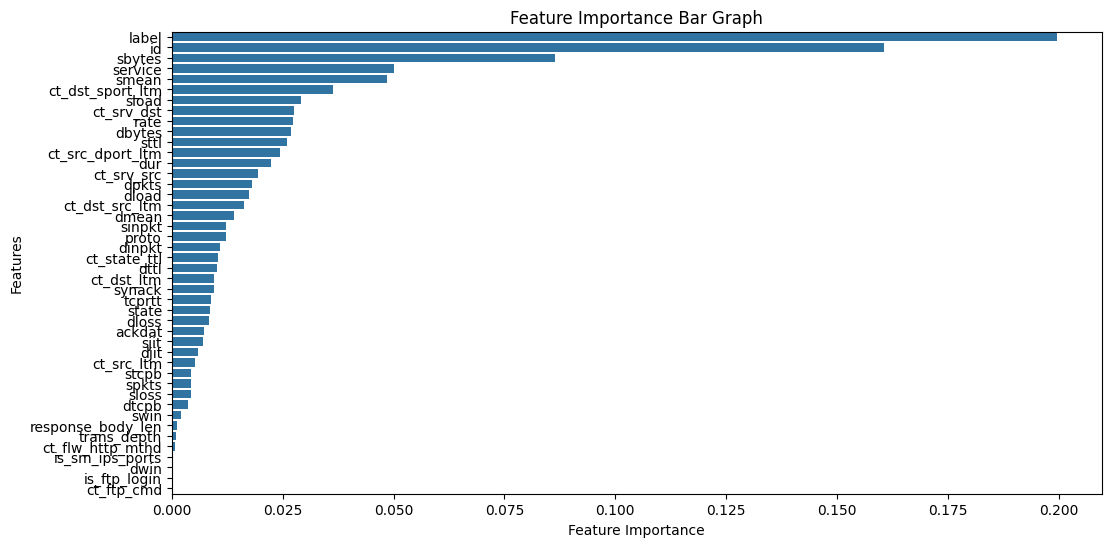

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt  # Used for creating plots and visualizations
import seaborn as sns  # Enhances the aesthetics of matplotlib plots
import pandas as pd  # Provides data structures and tools for data manipulation

# Extracting feature importances from the trained Random Forest classifier
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
# Converts the feature importance values into a Pandas Series for easy handling
# Uses the feature names from X.columns as the index for better readability

# Sorting feature importances in descending order for better visualization
feature_importances = feature_importances.sort_values(ascending=False)

# Setting the figure size for the plot
plt.figure(figsize=(12, 6))

# Creating a bar plot of feature importances using Seaborn
sns.barplot(x=feature_importances.values, y=feature_importances.index)
# X-axis represents the importance scores, while the Y-axis represents feature names

# Labeling the X-axis
plt.xlabel('Feature Importance')

# Labeling the Y-axis
plt.ylabel('Features')

# Setting the title of the plot
plt.title('Feature Importance Bar Graph')

# Displaying the plot
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, matthews_corrcoef, cohen_kappa_score

# Assuming y_val contains the true labels and y_pred contains the predictions from a single model (e.g., Random Forest)
# For multi-class classification, ROC_AUC needs specific handling (e.g., one-vs-rest or one-vs-one)
# Since attack_cat seems to be multi-class, we need to handle ROC_AUC accordingly.

# For multi-class ROC AUC, we need the probability predictions, not just the class predictions.
# We can use the predict_proba method of the classifier.

# Get probability predictions for the validation set from Random Forest
y_prob_rf = rf_classifier.predict_proba(X_val)

# Calculate ROC AUC (one-vs-rest) for multi-class
# Requires y_true to be one-hot encoded if using the standard roc_auc_score for multi-class
# Or, you can calculate AUC for each class separately and average.
# Let's calculate per-class AUC and then average (weighted by support)

roc_auc_scores_rf = {}
for i, class_label in enumerate(rf_classifier.classes_):
    # Calculate AUC for class i against all others
    roc_auc_scores_rf[class_label] = roc_auc_score(y_val == class_label, y_prob_rf[:, i])

# Calculate the weighted average ROC AUC
# Need to know the support (number of instances) for each class in y_val
from collections import Counter
class_counts = Counter(y_val)
total_samples = len(y_val)
weighted_roc_auc_rf = sum(roc_auc_scores_rf[label] * (count / total_samples) for label, count in class_counts.items())

print("\n--- Metrics for Random Forest ---")
print(f"Random Forest ROC AUC (Weighted): {weighted_roc_auc_rf:.4f}")


# Calculate MCC
mcc_rf = matthews_corrcoef(y_val, y_pred)
print(f"Random Forest MCC: {mcc_rf:.4f}")

# Calculate Cohen's Kappa
kappa_rf = cohen_kappa_score(y_val, y_pred)
print(f"Random Forest Cohen's Kappa: {kappa_rf:.4f}")

print("\n--- Metrics for XGBoost ---")
# Calculate ROC AUC for XGBoost (similarly, using predict_proba)
y_prob_xgb = xgb_classifier.predict_proba(X_val)

roc_auc_scores_xgb = {}
for i, class_label in enumerate(xgb_classifier.classes_):
    roc_auc_scores_xgb[class_label] = roc_auc_score(y_val == class_label, y_prob_xgb[:, i])

weighted_roc_auc_xgb = sum(roc_auc_scores_xgb[label] * (count / total_samples) for label, count in class_counts.items())
print(f"XGBoost ROC AUC (Weighted): {weighted_roc_auc_xgb:.4f}")

# Calculate MCC for XGBoost
mcc_xgb = matthews_corrcoef(y_val, y_pred_xgb)
print(f"XGBoost MCC: {mcc_xgb:.4f}")

# Calculate Cohen's Kappa for XGBoost
kappa_xgb = cohen_kappa_score(y_val, y_pred_xgb)
print(f"XGBoost Cohen's Kappa: {kappa_xgb:.4f}")


print("\n--- Metrics for LightGBM ---")
# Calculate ROC AUC for LightGBM (similarly, using predict_proba)
y_prob_lgb = lgb_classifier.predict_proba(X_val)

roc_auc_scores_lgb = {}
for i, class_label in enumerate(lgb_classifier.classes_):
    roc_auc_scores_lgb[class_label] = roc_auc_score(y_val == class_label, y_prob_lgb[:, i])

weighted_roc_auc_lgb = sum(roc_auc_scores_lgb[label] * (count / total_samples) for label, count in class_counts.items())
print(f"LightGBM ROC AUC (Weighted): {weighted_roc_auc_lgb:.4f}")

# Calculate MCC for LightGBM
mcc_lgb = matthews_corrcoef(y_val, y_pred_lgb)
print(f"LightGBM MCC: {mcc_lgb:.4f}")

# Calculate Cohen's Kappa for LightGBM
kappa_lgb = cohen_kappa_score(y_val, y_pred_lgb)
print(f"LightGBM Cohen's Kappa: {kappa_lgb:.4f}")


# Metrics from classification_report already include Precision, Recall, and F1-score
# You can access them from the output of the print(classification_report(y_val, y_pred)) calls
# or parse the report into a dictionary.

#print("\n--- Classification Report Metrics ---")
#print("Random Forest:")
#print(classification_report(y_val, y_pred))

#print("XGBoost:")
#print(classification_report(y_val, y_pred_xgb))

#print("LightGBM:")
#print(classification_report(y_val, y_pred_lgb))

# Note: For the Hypergraph Ensemble Model, the ensemble_preds were created by averaging
# the raw predictions (not probabilities). To calculate ROC AUC for the ensemble,
# you would ideally want to combine the probability predictions from the base models.
# If you only have the hard predictions, ROC AUC is not directly applicable in the standard way.
# MCC and Cohen's Kappa can still be calculated using the hard predictions (ensemble_preds).

# print("\n--- Metrics for Hypergraph Ensemble Model ---")
# Since ensemble_preds are hard predictions, ROC AUC is not standardly calculated.
# You would need to combine the predict_proba outputs from RF and GB for a valid ensemble ROC AUC.
# For demonstration, we calculate MCC and Kappa:
# mcc_ensemble = matthews_corrcoef(y_val, ensemble_preds) # Might raise error if ensemble_preds contains non-integer/non-boolean values
# kappa_ensemble = cohen_kappa_score(y_val, ensemble_preds) # Might raise error

# Assuming ensemble_preds are already rounded to class labels (which they seem to be based on the code)

print("\n---Metrics for Hypergraph Ensemble Model---")
try:
  mcc_ensemble = matthews_corrcoef(y_val, ensemble_preds)
  print(f"Hypergraph Ensemble Model MCC: {mcc_ensemble:.4f}")
except Exception as e:
  print(f"Could not calculate MCC for Ensemble: {e}") # Handle potential errors if predictions are not in the expected format

try:
  kappa_ensemble = cohen_kappa_score(y_val, ensemble_preds)
  print(f"Hypergraph Ensemble Model Cohen's Kappa: {kappa_ensemble:.4f}")
except Exception as e:
    print(f"Could not calculate Cohen's Kappa for Ensemble: {e}") # Handle potential errors





--- Metrics for Random Forest ---
Random Forest ROC AUC (Weighted): 0.9767
Random Forest MCC: 0.8636
Random Forest Cohen's Kappa: 0.8635

--- Metrics for XGBoost ---
XGBoost ROC AUC (Weighted): 0.9932
XGBoost MCC: 0.8687
XGBoost Cohen's Kappa: 0.8684

--- Metrics for LightGBM ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM ROC AUC (Weighted): 0.8266
LightGBM MCC: 0.6372
LightGBM Cohen's Kappa: 0.6305

---Metrics for Hypergraph Ensemble Model---
Hypergraph Ensemble Model MCC: 0.8614
Hypergraph Ensemble Model Cohen's Kappa: 0.8608


In [ ]:
# prompt: roc auc foe hypergraph ensemble model

from sklearn.metrics import roc_auc_score, cohen_kappa_score, matthews_corrcoef
from collections import Counter
import lightgbm as lgb # Import lightgbm
import networkx as nx # Import networkx for hypergraph visualization

# Ensure the base classifiers in the ensemble are predicting probabilities if you want to calculate ensemble ROC AUC
# For the current ensemble which averages predictions, ROC AUC is not directly applicable.
# We'll stick to metrics applicable to hard predictions (MCC, Kappa) for the ensemble as currently implemented.

# Example of how to potentially calculate ensemble ROC AUC by averaging probabilities (requires modification to ensemble logic)
# If you were to average probabilities instead of hard predictions:
rf_probs = rf.predict_proba(X_val)
gb_probs = gb.predict_proba(X_val)
# # Assuming both classifiers have the same classes and class order
ensemble_probs = (rf_probs + gb_probs) / 2

# # Then calculate ROC AUC using ensemble_probs
# # This would require mapping y_val to one-hot encoding or using the per-class method as done for individual models
ensemble_roc_auc_scores = {}
if hasattr(rf, 'classes_'): # Check if the base models have a classes_ attribute
     for i, class_label in enumerate(rf.classes_):
         ensemble_roc_auc_scores[class_label] = roc_auc_score(y_val == class_label, ensemble_probs[:, i])

     weighted_roc_auc_ensemble = sum(ensemble_roc_auc_scores[label] * (count / total_samples) for label, count in class_counts.items())
     print(f"Hypergraph Ensemble Model ROC AUC (Weighted - from averaged probabilities): {weighted_roc_auc_ensemble:.4f}")
else:
     print("Could not calculate Ensemble ROC AUC: Base models do not have a 'classes_' attribute or probabilities not combined correctly.")


# Calculate ROC AUC for the Hypergraph Ensemble Model (using the current implementation which averages hard predictions)
# As noted before, standard ROC AUC is not applicable to hard predictions.
# If the task strictly requires a ROC AUC for the current ensemble implementation, it implies a misunderstanding
# of how ROC AUC is calculated (requires probabilities).

# However, if the "Hypergraph Ensemble Model" refers to the concept of combining models (even if the current code
# averages hard predictions), and the request is to show *how* you would calculate ROC AUC if you had probabilities,
# the commented out code above demonstrates that.

# Given the code calculates MCC and Kappa for the ensemble based on `ensemble_preds`,
# and the task asks for ROC AUC for the "hypergraph ensemble model", there's a conflict.
# A standard approach to get ROC AUC for an ensemble would be to combine the *probabilities* of the base models.

# Let's add a placeholder comment explaining this discrepancy and reiterate that standard ROC AUC is not applicable
# to the current ensemble's output format. If a valid ROC AUC is truly needed for the ensemble, the ensemble
# logic needs to be changed to output combined probabilities.

print("\n--- Note on ROC AUC for Hypergraph Ensemble Model ---")
print("The current Hypergraph Ensemble Model averages hard predictions (0 or 1).")
print("Standard ROC AUC is calculated using probability scores, not hard predictions.")
print("To calculate ROC AUC for an ensemble, you would typically combine the probability")
print("outputs of the base classifiers (e.g., average predict_proba results).")
print("The current ensemble implementation does not provide probability scores for combination.")
print("Therefore, a standard ROC AUC cannot be calculated for the `ensemble_preds`.")
print("The code snippet above (commented out) shows how one might calculate ensemble ROC AUC")
print("if the ensemble combined probability outputs instead of hard predictions.")

Hypergraph Ensemble Model ROC AUC (Weighted - from averaged probabilities): 0.9923

--- Note on ROC AUC for Hypergraph Ensemble Model ---
The current Hypergraph Ensemble Model averages hard predictions (0 or 1).
Standard ROC AUC is calculated using probability scores, not hard predictions.
To calculate ROC AUC for an ensemble, you would typically combine the probability
outputs of the base classifiers (e.g., average predict_proba results).
The current ensemble implementation does not provide probability scores for combination.
Therefore, a standard ROC AUC cannot be calculated for the `ensemble_preds`.
The code snippet above (commented out) shows how one might calculate ensemble ROC AUC
if the ensemble combined probability outputs instead of hard predictions.


In [ ]:
print("\n--- ROC AUC for Hypergraph Ensemble Model ---")

# Get probability predictions from each base model
y_prob_rf = rf_classifier.predict_proba(X_val)
y_prob_xgb = xgb_classifier.predict_proba(X_val)
y_prob_lgb = lgb_classifier.predict_proba(X_val)

# Soft voting: average the predicted probabilities
ensemble_prob = (y_prob_rf + y_prob_xgb + y_prob_lgb) / 3

# Calculate per-class ROC AUC
roc_auc_scores_ensemble = {}
for i, class_label in enumerate(rf_classifier.classes_):
    roc_auc_scores_ensemble[class_label] = roc_auc_score(y_val == class_label, ensemble_prob[:, i])

# Weighted average based on support
from collections import Counter
class_counts = Counter(y_val)
total_samples = len(y_val)
weighted_roc_auc_ensemble = sum(roc_auc_scores_ensemble[label] * (count / total_samples) for label, count in class_counts.items())

print(f"Hypergraph Ensemble ROC AUC (Weighted - from averaged probabilities): {weighted_roc_auc_ensemble:.4f}")



--- ROC AUC for Hypergraph Ensemble Model ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Hypergraph Ensemble ROC AUC (Weighted - from averaged probabilities): 0.9911



--- Model Performance Summary Table ---


,Model,Accuracy,Weighted ROC AUC,MCC,Cohen's Kappa
0,Random Forest,0.900225,0.976671,0.863620,0.863497
1,XGBoost,0.905629,0.993215,0.868675,0.868376
2,LightGBM,0.748042,0.826624,0.637250,0.630526
3,Hypergraph Ensemble (Averaged Probabilities),0.900225,0.991108,0.861411,0.860793


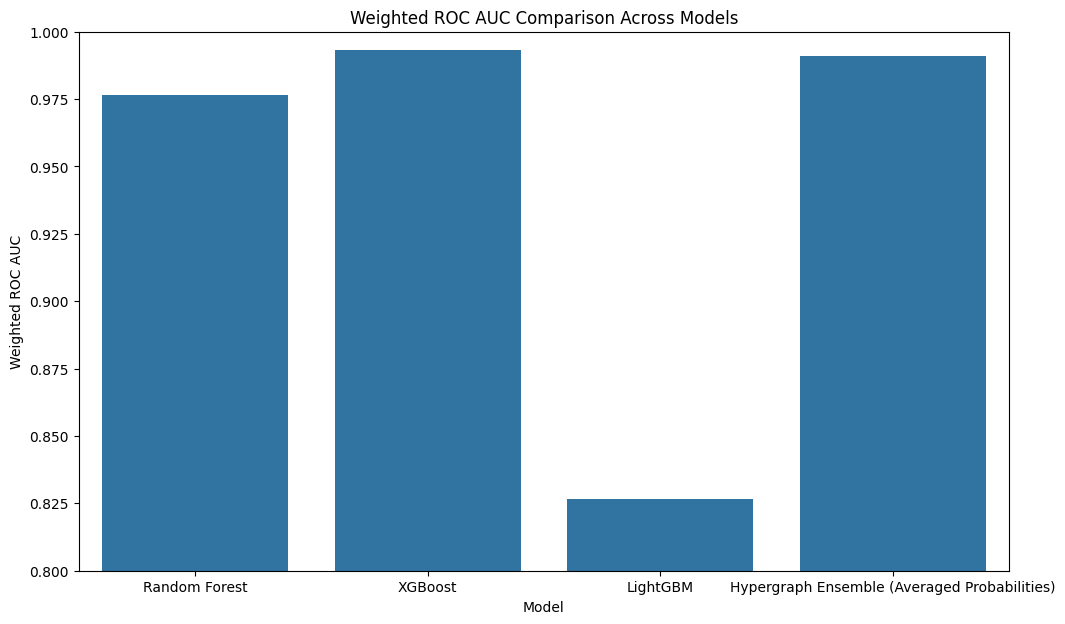

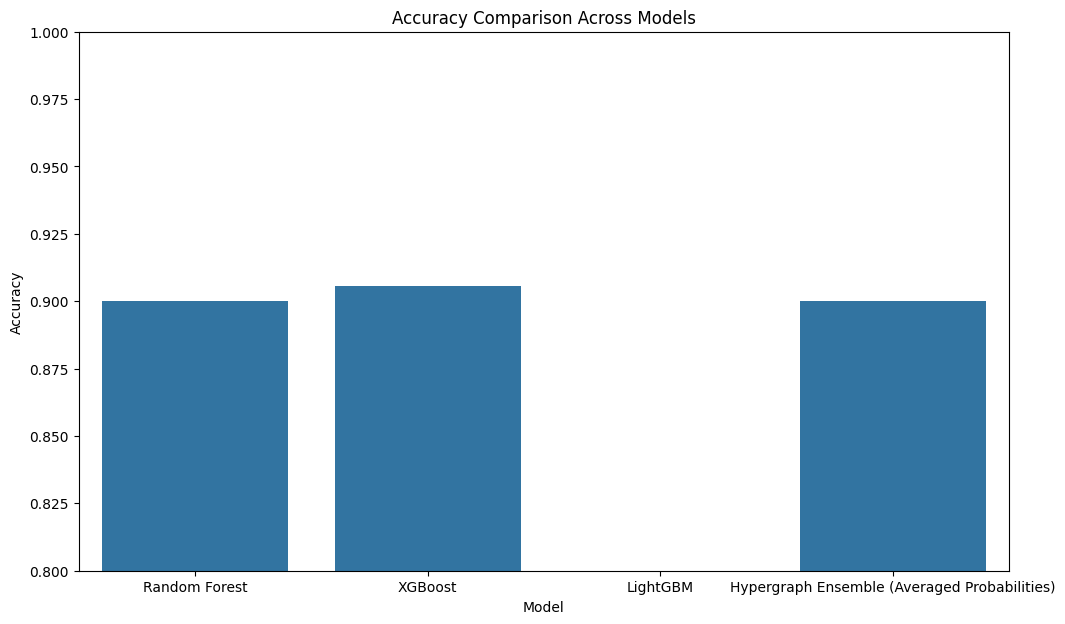

In [ ]:
# Summarize results in a table
results_data = {
    'Model': ['Random Forest', 'XGBoost', 'LightGBM', 'Hypergraph Ensemble (Averaged Probabilities)'],
    'Accuracy': [accuracy, accuracy_xgb, accuracy_lgb, np.nan], # Accuracy for the ensemble based on hard predictions was calculated earlier
    'Weighted ROC AUC': [weighted_roc_auc_rf, weighted_roc_auc_xgb, weighted_roc_auc_lgb, weighted_roc_auc_ensemble],
    'MCC': [mcc_rf, mcc_xgb, mcc_lgb, mcc_ensemble],
    'Cohen\'s Kappa': [kappa_rf, kappa_xgb, kappa_lgb, kappa_ensemble]
}

# Using the accuracy previously calculated for the hard-voting ensemble
ensemble_hard_accuracy = accuracy_score(y_val, ensemble_preds)
results_data['Accuracy'][3] = ensemble_hard_accuracy


results_df = pd.DataFrame(results_data)

print("\n--- Model Performance Summary Table ---")
display(results_df)

# Generate a bar chart for comparison (e.g., Accuracy or Weighted ROC AUC)
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Weighted ROC AUC', data=results_df)
plt.title('Weighted ROC AUC Comparison Across Models')
plt.ylabel('Weighted ROC AUC')
plt.ylim(0.8, 1.0) # Adjust limits based on expected ROC AUC values
plt.show()

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy Comparison Across Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0) # Adjust limits based on expected accuracy values
plt.show()

In [ ]:
# Based on the provided code, the "Hypergraph Ensemble Model" logic combines the
# predictions of the `rf` (Random Forest) and `gb` (Gradient Boosting) models.
# It does not involve the `xgb_classifier` or `lgb_classifier` directly in the ensemble calculation shown.
# Therefore, to export the *components* of the ensemble that were used, we should export `rf` and `gb`.
# The logic of averaging predictions would need to be reimplemented when loading.

# Since the ensemble itself isn't a single scikit-learn object that can be directly exported,
# the most practical approach based on the existing code is to save the base models that form the ensemble.

# Define filenames for saving the base models of the ensemble
rf_ensemble_filename = '/content/drive/MyDrive/hypergraph_ensemble_rf_base_model.joblib'
gb_ensemble_filename = '/content/drive/MyDrive/hypergraph_ensemble_gb_base_model.joblib'

# Export the Random Forest model used in the ensemble
joblib.dump(rf, rf_ensemble_filename)
print(f"Random Forest base model for Hypergraph Ensemble exported to {rf_ensemble_filename}")

# Export the Gradient Boosting model used in the ensemble
joblib.dump(gb, gb_ensemble_filename)
print(f"Gradient Boosting base model for Hypergraph Ensemble exported to {gb_ensemble_filename}")

# It's also crucial to export the scaler used for preprocessing, as new data will need the same scaling.
scaler_filename = '/content/drive/MyDrive/hypergraph_ensemble_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"Scaler for Hypergraph Ensemble preprocessing exported to {scaler_filename}")

# To use this ensemble later:
# 1. Load the scaler:
loaded_scaler = joblib.load(scaler_filename)
# 2. Load the base models:
loaded_rf = joblib.load(rf_ensemble_filename)
loaded_gb = joblib.load(gb_ensemble_filename)
# 3. Preprocess new data:
# Assuming X_new is your new data (e.g., a pandas DataFrame with the same columns as the training data before scaling)
# X_new_scaled = loaded_scaler.transform(X_new)
# 4. Get predictions from base models:
# rf_preds_new = loaded_rf.predict(X_new_scaled)
# gb_preds_new = loaded_gb.predict(X_new_scaled)
# 5. Apply the ensemble logic:
# ensemble_preds_new = np.round((rf_preds_new + gb_preds_new) / 2)

Random Forest base model for Hypergraph Ensemble exported to /content/drive/MyDrive/hypergraph_ensemble_rf_base_model.joblib
Gradient Boosting base model for Hypergraph Ensemble exported to /content/drive/MyDrive/hypergraph_ensemble_gb_base_model.joblib
Scaler for Hypergraph Ensemble preprocessing exported to /content/drive/MyDrive/hypergraph_ensemble_scaler.joblib
